In [1]:
import numpy as np
import pandas as pd


In [3]:
data = pd.read_csv('Housing Dataset.csv')

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
#First we have preprocessed the data 
#we can see that there are some missing term in coloumn car,buildingarea,yearbuit and council area

In [5]:
#Filling data of building Area
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median())

In [6]:
#filling data of year built 

data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].mode()[0])




In [7]:
#now we fill the values of car

data['Car']=data["Car"].fillna(0)

In [8]:
#Now fill council area

data['CouncilArea'] = data['CouncilArea'].fillna(data.CouncilArea.mode()[0])

In [9]:
from sklearn import preprocessing

lab_enc=preprocessing.LabelEncoder()
#SUburb   314 value
freq_sub = round(100*data.Suburb.value_counts()/len(data.index), 2)
data['Suburb'] = data['Suburb'].apply(lambda x: freq_sub[x])


#SelleG have a total of 263 values
freq_sellerg = round(100*data.SellerG.value_counts()/len(data.index), 2)
data['SellerG'] = data['SellerG'].apply(lambda x: freq_sellerg[x])





In [10]:
# room are not needed to be preprocessed
#type h,u,t are converted in lable by lable encoder
#1 2 34 32 13 324 3 5345 112 34
# 1 2 1 2 2
#3/5=0.6


data['Type']=pd.Series(lab_enc.fit_transform(data['Type']))
#methord
data['Method']=pd.Series(lab_enc.fit_transform(data['Method']))

In [11]:
# Date
#28/08/2001
ds, ms, ys = [], [], []
for row in data["Date"]:
    d, m, y = list(map(int, row.split('/')))
    ds.append(d)
    ms.append(m)
    ys.append(y)

data["DaySold"] = ds
data["MonthSold"] = ms
data["YearSold"] = ys
data = data.drop("Date", axis=1)

In [12]:
#Distance
streets = []
for addr in data["Address"]:
    address = addr.split(' ')
    # street_general_area = address[1:]
    street_general_area = address[-2]
    streets.append(street_general_area)


In [13]:
data["Address"] = streets
data["Address"] = pd.Series(lab_enc.fit_transform(data["Address"]))
#Postcode
freq_postcode = round(100*data.Postcode.value_counts()/len(data.index), 2)
#data['Postcode'] = data['Postcode'].apply(lambda x: freq_postcode)
#Bedroom,Bathroom , car and car are not needed to be preprocessed
#landsize,Buildingarea,


In [14]:
#Year Built
data['YearBuilt']=pd.Series(lab_enc.fit_transform(data['YearBuilt']))
#councilArea
freq_council = round(100*data.CouncilArea.value_counts()/len(data.index), 2)
data['CouncilArea'] = data['CouncilArea'].apply(lambda x: freq_council[x])
#latitude, longitude
#region name
data['Regionname']=pd.Series(lab_enc.fit_transform(data['Regionname']))

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  float64
 1   Address        13580 non-null  int64  
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  int64  
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  int64  
 6   SellerG        13580 non-null  float64
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  float64
 9   Bedroom2       13580 non-null  float64
 10  Bathroom       13580 non-null  float64
 11  Car            13580 non-null  float64
 12  Landsize       13580 non-null  float64
 13  BuildingArea   13580 non-null  float64
 14  YearBuilt      13580 non-null  int64  
 15  CouncilArea    13580 non-null  float64
 16  Lattitude      13580 non-null  float64
 17  Longtitude     13580 non-null  float64
 18  Region

In [16]:
#Feature Engenerring
from sklearn.model_selection import train_test_split

X=data.drop(['Price'],axis=1)
Y=data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)



In [17]:
from sklearn.feature_selection import f_regression
f_value = f_regression(X, Y)
feature_name=X.columns
for feature in zip(feature_name, f_value[0]):
    print(feature)

('Suburb', 43.98877614516688)
('Address', 0.2520885800055402)
('Rooms', 4445.375633002306)
('Type', 2817.874921020954)
('Method', 19.36746062993607)
('SellerG', 41.97815599028362)
('Distance', 368.3703298271484)
('Postcode', 159.8437653098493)
('Bedroom2', 3976.6423361779507)
('Bathroom', 3787.939784140643)
('Car', 792.4269807131716)
('Landsize', 19.12856029322579)
('BuildingArea', 66.40486565252048)
('YearBuilt', 1005.4997927245431)
('CouncilArea', 9.001023607838695)
('Lattitude', 644.8754062613365)
('Longtitude', 587.524800385938)
('Regionname', 85.5087991870125)
('Propertycount', 24.168917653219914)
('DaySold', 1.7119517490989111)
('MonthSold', 10.630125366877271)
('YearSold', 0.21654469188291484)


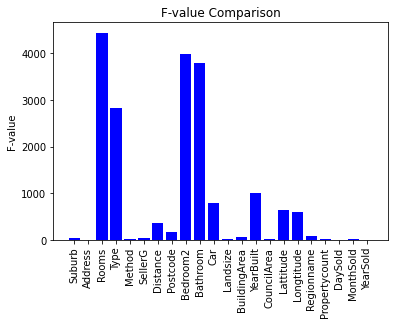

In [18]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.bar(x=feature_name, height=f_value[0], color='blue')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

In [19]:
#variance Threshold

from sklearn.feature_selection import VarianceThreshold
select = VarianceThreshold()
select.fit_transform(X)


for feature in zip(feature_name, select.variances_):
    print(feature)

('Suburb', 0.33545117174557143)
('Address', 4123.0)
('Rooms', 0.9133868571341811)
('Type', 0.6936349261779323)
('Method', 1.2523032604475524)
('SellerG', 11.51)
('Distance', 34.4393962326561)
('Postcode', 977.0)
('Bedroom2', 0.9329347932179568)
('Bathroom', 0.4784298739157689)
('Car', 0.9341457430033338)
('Landsize', 433014.0)
('BuildingArea', 44515.0)
('YearBuilt', 143.0)
('CouncilArea', 18.639999999999997)
('Lattitude', 0.0062816568783015505)
('Longtitude', 0.010797648730010415)
('Regionname', 4.097625216629323)
('Propertycount', 21401.0)
('DaySold', 29.0)
('MonthSold', 6.430992579835633)
('YearSold', 0.24888233367531304)


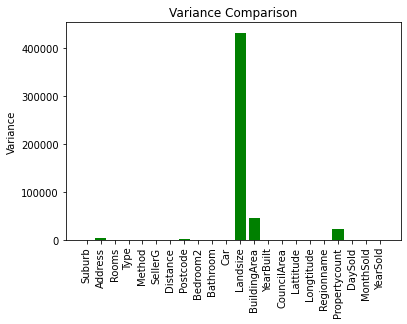

In [20]:
plt.bar(x=feature_name, height=select.variances_, color='green')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

In [21]:
from sklearn.feature_selection import mutual_info_regression
mc = mutual_info_regression(X, Y, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(feature_name, mc):
    print(feature)

('Suburb', 0.19453473277175437)
('Address', 0.02275401332118676)
('Rooms', 0.2295955204140827)
('Type', 0.17289846331665748)
('Method', 0.11394811098497382)
('SellerG', 0.11052445884858919)
('Distance', 0.20797971958739403)
('Postcode', 0.32110017068905083)
('Bedroom2', 0.20705714751288085)
('Bathroom', 0.1357485363176676)
('Car', 0.09439166925103493)
('Landsize', 0.14390236035731663)
('BuildingArea', 0.1924237080562925)
('YearBuilt', 0.08376091598119295)
('CouncilArea', 0.16477087729842532)
('Lattitude', 0.14661478819169904)
('Longtitude', 0.15466770307422628)
('Regionname', 0.10892719546450191)
('Propertycount', 0.20441932431840115)
('DaySold', 0.0)
('MonthSold', 0.004570464623413706)
('YearSold', 0.0038078323491106403)


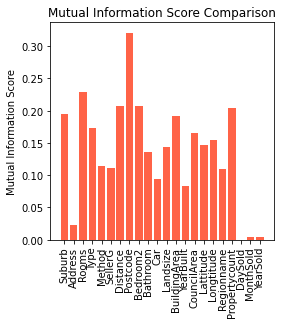

In [22]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_name, height=mc, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

In [23]:
#using selector object for selecting Features
from sklearn.feature_selection import SelectKBest
skb = SelectKBest(score_func=f_regression, k=6)                  
x_new = skb.fit_transform(X, Y)

print('Number of features before feature selection: {}'.format(X.shape[1]))
print('Number of features after feature selection: {}'.format(x_new.shape[1]))

Number of features before feature selection: 22
Number of features after feature selection: 6


In [33]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 32.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [37]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [38]:
from sklearn.linear_model import LinearRegression
#import joblib
from mlxtend.feature_selection import SequentialFeatureSelector
sel = SequentialFeatureSelector(estimator=LinearRegression(),k_features=(1,22), forward=True)
sel.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 22))

In [39]:
print('Best accuracy score: %.2f' % sel.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sel.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sel.k_feature_names_)

Best accuracy score: 0.57
Best subset (indices): (0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 20, 21)
Best subset (corresponding names): ('Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'MonthSold', 'YearSold')


In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
selector = SelectFromModel(estimator=RandomForestRegressor())
selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [41]:
print('The most important features based on random forest classifier:')
for feature_list_index in selector.get_support(indices=True):
    print('- ' + feature_name[feature_list_index])

The most important features based on random forest classifier:
- Rooms
- Type
- Distance
- Postcode
- Landsize
- BuildingArea
- Longtitude


In [42]:
x_imp_train = selector.transform(X_train)
x_imp_test = selector.transform(X_test)

# Print the results
print('Number of features before transformation: {}'.format(X_train.shape[1]))
print('Number of features after transformation: {}'.format(x_imp_train.shape[1]))

Number of features before transformation: 22
Number of features after transformation: 7


In [43]:
from sklearn.metrics import r2_score


In [44]:
rfr_full = RandomForestRegressor()

rfr_full.fit(X_train, y_train)

# Make predictions
pred_full = rfr_full.predict(X_test)

# Generate accuracy score
print("r2 score: ",r2_score(y_test, pred_full))


r2 score:  0.81727550801896


In [45]:
rfr_lim = RandomForestRegressor()

# Train the classifier with limited features
rfr_lim.fit(x_imp_train, y_train)

# Make predictions
pred_lim = rfr_lim.predict(x_imp_test)

print("r2 score: ",r2_score(y_test, pred_lim))

r2 score:  0.7988211862230382
